In [ ]:
import pandas as pd
import numpy as np
import re
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from itertools import product
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')
#plt.style.use('seaborn-pastel')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tq

sys.path.append("..")
from utils.util_functions import *

In [2]:
event_df = make_df(data_dir=DETAIL_DATA_DIR_MLB)
df_2017 = make_df(end=1944417, data_dir=DETAIL_DATA_DIR_MLB)
df_2018 = make_df(start=1944417, data_dir=DETAIL_DATA_DIR_MLB)

In [3]:
files = os.listdir(DETAIL_DATA_DIR_MLB)[1:]
names = pd.Series(files).apply(lambda x: int(x.split(".")[0]))
files_2017 = names[names<=1944417].apply(lambda x: str(x)+".csv")
files_2018 = names[names>1944417].apply(lambda x: str(x)+".csv")

In [4]:
column = "得点"
teams_mlb = list(set(pd.read_csv(os.path.join(SCORE_DATA_DIR_MLB, "score_mlb.csv"), encoding="cp932", index_col=0).表チーム))
teams_mlb.remove("ア・リーグ")

In [10]:
diffs = []
stds = []
for team in teams_mlb:
    lst = make_flattened_list(make_inning_triple(make_inning_list(event_df[event_df.攻撃チーム==team])))
    std = make_score_df_mlb(team).describe()[column]["std"] / make_score_df_mlb(team).describe()[column]["mean"]
    second_cond_entropy = cond_entropy(pd.DataFrame(lst)[2].values, pd.DataFrame(lst)[[0, 1]].values)
    first_cond_entropy = cond_entropy(pd.DataFrame(lst)[2].values, pd.DataFrame(lst)[[1]].values)
    #diffs.append(calc_entropy(lst))
    diffs.append(first_cond_entropy-second_cond_entropy)
    stds.append(std)
    print(team, diffs[-1], std, first_cond_entropy, second_cond_entropy)

ブレーブス 0.1017182146911213 0.70938418131 1.3704998573862803 1.268781642695159
エンゼルス 0.09404297989439625 0.692139970806 1.3326350212108662 1.23859204131647
マーリンズ 0.10130686854860205 0.745161351662 1.3573287757723382 1.2560219072237362
オリオールズ 0.08542504778901128 0.781906801829 1.2861552264200204 1.2007301786310092
パイレーツ 0.09870168113230449 0.713864249192 1.3578150400431506 1.259113358910846
カージナルス 0.10017777147960416 0.668960338682 1.367842348916378 1.2676645774367739
Rソックス 0.09841021323377497 0.669210021299 1.3828544113550727 1.2844441981212977
ブルージェイズ 0.09557636441866313 0.666022782951 1.3317889959164488 1.2362126314977857
アストロズ 0.09220867717215331 0.684975274055 1.3902264721911997 1.2980177950190463
Wソックス 0.09414835737331417 0.720786613389 1.3434284947140211 1.249280137340707
タイガース 0.09171421048525419 0.72243695297 1.3275281370110368 1.2358139265257826
ジャイアンツ 0.08968661862896132 0.737955073316 1.2934508942930552 1.2037642756640938
ヤンキース 0.08231715765795755 0.61072599013 1.34747068144448

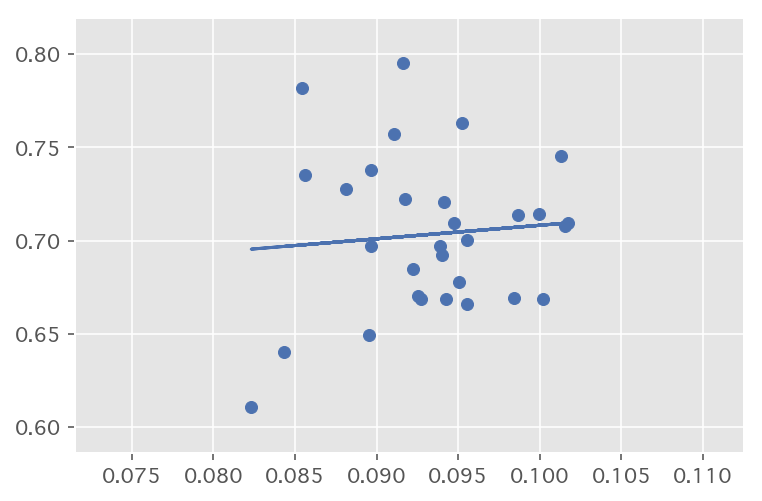

In [11]:
import statsmodels.api as sm

nsample = len(diffs)
X = np.column_stack((np.repeat(1, nsample), diffs))

model = sm.OLS(stds, X)
results = model.fit()

a, b = results.params

plt.scatter(diffs, stds)
plt.plot(diffs, a+b*np.array(diffs))
plt.show()

In [12]:
results.pvalues

array([  1.17996398e-04,   6.38072687e-01])

In [13]:
diffs = []
stds = []
for team in teams_mlb:
    lst_2017 = make_flattened_list(make_inning_triple(make_inning_list(df_2017[df_2017.攻撃チーム==team])))
    #lst_2018 = make_flattened_list(make_inning_triple(make_inning_list(df_2018[df_2018.攻撃チーム==team])))
    std_2017 = make_score_df_mlb(team, 2017).describe()[column]["std"] / make_score_df_mlb(team, 2017).describe()[column]["mean"]
    #std_2018 = make_score_df_mlb(team, 2018).describe()[column]["std"] / make_score_df_mlb(team, 2018).describe()[column]["mean"]
    second_cond_entropy_2017 = cond_entropy(pd.DataFrame(lst_2017)[2].values, pd.DataFrame(lst_2017)[[0, 1]].values)
    first_cond_entropy_2017 = cond_entropy(pd.DataFrame(lst_2017)[2].values, pd.DataFrame(lst_2017)[[1]].values)
    #second_cond_entropy_2018 = cond_entropy(pd.DataFrame(lst_2018)[2].values, pd.DataFrame(lst_2018)[[0, 1]].values)
    #first_cond_entropy_2018 = cond_entropy(pd.DataFrame(lst_2018)[2].values, pd.DataFrame(lst_2018)[[1]].values)
    diffs.append(first_cond_entropy_2017-second_cond_entropy_2017)
    stds.append(std_2017)
    #diffs.append(first_cond_entropy_2018-second_cond_entropy_2018)
    #stds.append(std_2018)
    print(team, diffs[-1], std, first_cond_entropy_2017, second_cond_entropy_2017)

ブレーブス 0.1518066526053352 0.6973869369 1.3740755816088495 1.2222689290035142
エンゼルス 0.14241713257602706 0.6973869369 1.3357571027998185 1.1933399702237915
マーリンズ 0.1578931971748041 0.6973869369 1.4045833194068282 1.2466901222320241
オリオールズ 0.12436188029357709 0.6973869369 1.270550866190408 1.1461889858968308
パイレーツ 0.14768869091499282 0.6973869369 1.3490249857797432 1.2013362948647504
カージナルス 0.1631830568147552 0.6973869369 1.387111754910944 1.2239286980961888
Rソックス 0.1465201970638117 0.6973869369 1.356149871376119 1.2096296743123074
ブルージェイズ 0.13132091466287532 0.6973869369 1.3011702442320843 1.169849329569209
アストロズ 0.1355573656122413 0.6973869369 1.4067018559948874 1.271144490382646
Wソックス 0.13027357537162665 0.6973869369 1.3404625110636248 1.2101889356919981
タイガース 0.13030492759104595 0.6973869369 1.3260628110271155 1.1957578834360696
ジャイアンツ 0.13212516115687833 0.6973869369 1.3075872632494723 1.175462102092594
ヤンキース 0.12387774808847851 0.6973869369 1.3565383563995903 1.2326606083111118
ツインズ 

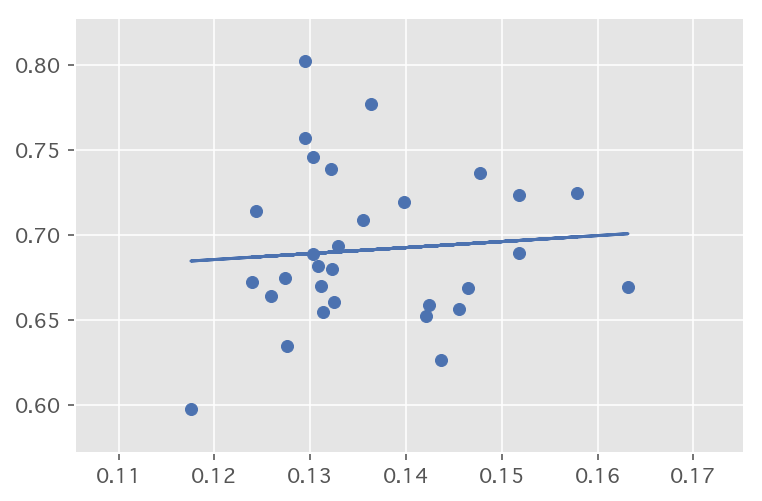

In [14]:
import statsmodels.api as sm

nsample = len(diffs)
X = np.column_stack((np.repeat(1, nsample), diffs))

model = sm.OLS(stds, X)
results = model.fit()

a, b = results.params

plt.scatter(diffs, stds)
plt.plot(diffs, a+b*np.array(diffs))
plt.show()

In [15]:
results.pvalues

array([  2.50846406e-06,   6.63159540e-01])

In [16]:
diffs = []
stds = []
for team in teams_mlb:
    #lst_2017 = make_flattened_list(make_inning_triple(make_inning_list(df_2017[df_2017.攻撃チーム==team])))
    lst_2018 = make_flattened_list(make_inning_triple(make_inning_list(df_2018[df_2018.攻撃チーム==team])))
    #std_2017 = make_score_df_mlb(team, 2017).describe()[column]["std"] / make_score_df_mlb(team, 2017).describe()[column]["mean"]
    std_2018 = make_score_df_mlb(team, 2018).describe()[column]["std"] / make_score_df_mlb(team, 2018).describe()[column]["mean"]
    #second_cond_entropy_2017 = cond_entropy(pd.DataFrame(lst_2017)[2].values, pd.DataFrame(lst_2017)[[0, 1]].values)
    #first_cond_entropy_2017 = cond_entropy(pd.DataFrame(lst_2017)[2].values, pd.DataFrame(lst_2017)[[1]].values)
    second_cond_entropy_2018 = cond_entropy(pd.DataFrame(lst_2018)[2].values, pd.DataFrame(lst_2018)[[0, 1]].values)
    first_cond_entropy_2018 = cond_entropy(pd.DataFrame(lst_2018)[2].values, pd.DataFrame(lst_2018)[[1]].values)
    #diffs.append(first_cond_entropy_2017-second_cond_entropy_2017)
    #stds.append(std_2017)
    diffs.append(first_cond_entropy_2018-second_cond_entropy_2018)
    stds.append(std_2018)
    print(team, diffs[-1], std)

ブレーブス 0.1301612006193813 0.6973869369
エンゼルス 0.12532319849209195 0.6973869369
マーリンズ 0.1171643919833274 0.6973869369
オリオールズ 0.11231532406723188 0.6973869369
パイレーツ 0.12542768577344843 0.6973869369
カージナルス 0.12053042214625798 0.6973869369
Rソックス 0.13330906406466836 0.6973869369
ブルージェイズ 0.13417247171493596 0.6973869369
アストロズ 0.12195401254553095 0.6973869369
Wソックス 0.1258509740863225 0.6973869369
タイガース 0.12501103282995718 0.6973869369
ジャイアンツ 0.10919728615822955 0.6973869369
ヤンキース 0.11676813928819518 0.6973869369
ツインズ 0.12241767359335665 0.6973869369
カブス 0.13659448152065945 0.6973869369
メッツ 0.11802156380895434 0.6973869369
レイズ 0.13844677126220928 0.6973869369
マリナーズ 0.13224037509332254 0.6973869369
Dバックス 0.13331809424393093 0.6973869369
ドジャース 0.12497533784888093 0.6973869369
ロイヤルズ 0.12162902050561897 0.6973869369
インディアンス 0.12894548259014282 0.6973869369
アスレチックス 0.12580555131312954 0.6973869369
ナショナルズ 0.12976212646213447 0.6973869369
ブリュワーズ 0.11377817349891206 0.6973869369
パドレス 0.12005902584555583

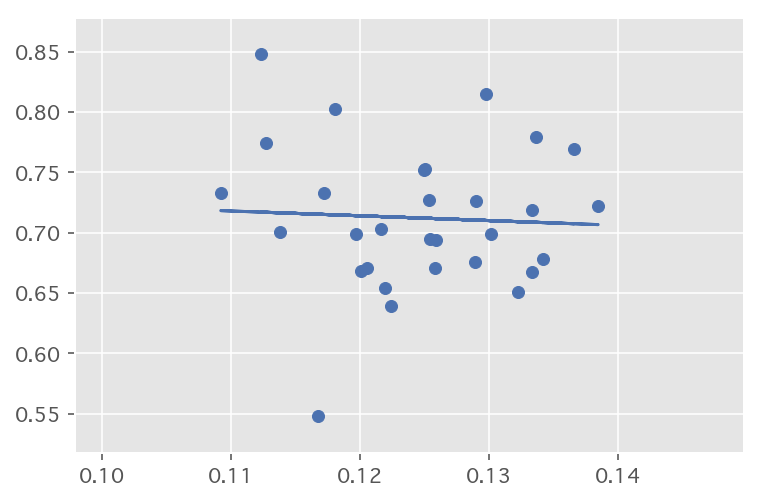

In [17]:
import statsmodels.api as sm

nsample = len(diffs)
X = np.column_stack((np.repeat(1, nsample), diffs))

model = sm.OLS(stds, X)
results = model.fit()

a, b = results.params

plt.scatter(diffs, stds)
plt.plot(diffs, a+b*np.array(diffs))
plt.show()

In [18]:
results.pvalues

array([  2.88295089e-04,   7.89645619e-01])

In [19]:
diffs = []
stds = []
for team in teams_mlb:
    lst_2017 = make_flattened_list(make_inning_triple(make_inning_list(df_2017[df_2017.攻撃チーム==team])))
    lst_2017 = [elem for elem in lst_2017 if is_improved(elem[0], elem[1])]
    lst_2018 = make_flattened_list(make_inning_triple(make_inning_list(df_2018[df_2018.攻撃チーム==team])))
    lst_2018 = [elem for elem in lst_2018 if is_improved(elem[0], elem[1])]
    std_2017 = make_score_df_mlb(team, 2017).describe()[column]["std"] / make_score_df_mlb(team, 2017).describe()[column]["mean"]
    std_2018 = make_score_df_mlb(team, 2018).describe()[column]["std"] / make_score_df_mlb(team, 2018).describe()[column]["mean"]
    second_cond_entropy_2017 = cond_entropy(pd.DataFrame(lst_2017)[2].values, pd.DataFrame(lst_2017)[[0, 1]].values)
    first_cond_entropy_2017 = cond_entropy(pd.DataFrame(lst_2017)[2].values, pd.DataFrame(lst_2017)[[1]].values)
    second_cond_entropy_2018 = cond_entropy(pd.DataFrame(lst_2018)[2].values, pd.DataFrame(lst_2018)[[0, 1]].values)
    first_cond_entropy_2018 = cond_entropy(pd.DataFrame(lst_2018)[2].values, pd.DataFrame(lst_2018)[[1]].values)
    diffs.append(first_cond_entropy_2017-second_cond_entropy_2017)
    stds.append(std_2017)
    diffs.append(first_cond_entropy_2018-second_cond_entropy_2018)
    stds.append(std_2018)
    print(team, diffs[-1], std)

ブレーブス 0.11433282858393667 0.6973869369
エンゼルス 0.10504084478140374 0.6973869369
マーリンズ 0.08984662789755893 0.6973869369
オリオールズ 0.1109289081306013 0.6973869369
パイレーツ 0.1020348941473661 0.6973869369
カージナルス 0.09407032721981734 0.6973869369
Rソックス 0.11760077612324427 0.6973869369
ブルージェイズ 0.11729123914650552 0.6973869369
アストロズ 0.10265013705366188 0.6973869369
Wソックス 0.1041234511513145 0.6973869369
タイガース 0.10036962660259041 0.6973869369
ジャイアンツ 0.09927796375643183 0.6973869369
ヤンキース 0.09149909397500977 0.6973869369
ツインズ 0.10695452254892679 0.6973869369
カブス 0.11554871065005878 0.6973869369
メッツ 0.09129411759026906 0.6973869369
レイズ 0.09670608293497507 0.6973869369
マリナーズ 0.09676329314064747 0.6973869369
Dバックス 0.10334897871347559 0.6973869369
ドジャース 0.09616358589155771 0.6973869369
ロイヤルズ 0.09908295826340874 0.6973869369
インディアンス 0.10606640155139546 0.6973869369
アスレチックス 0.10072850629836694 0.6973869369
ナショナルズ 0.10100383962745152 0.6973869369
ブリュワーズ 0.09510250799966968 0.6973869369
パドレス 0.09299552821627222

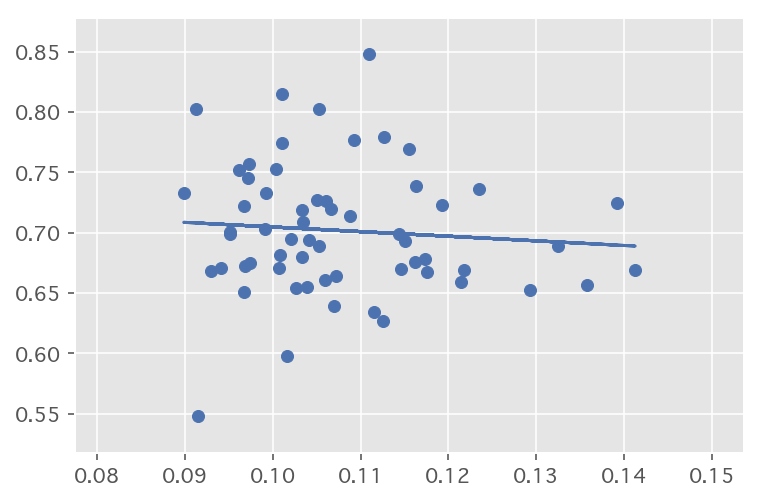

In [20]:
import statsmodels.api as sm

nsample = len(diffs)
X = np.column_stack((np.repeat(1, nsample), diffs))

model = sm.OLS(stds, X)
results = model.fit()

a, b = results.params

plt.scatter(diffs, stds)
plt.plot(diffs, a+b*np.array(diffs))
plt.show()

In [21]:
results.pvalues

array([  9.72023615e-17,   5.20286439e-01])

In [ ]:
team = "Rソックス"

In [ ]:
df_2017.shape[0] + df_2018.shape[0]

In [ ]:
lst_2017 = make_flattened_list(make_inning_triple(make_inning_list(df_2017[df_2017.攻撃チーム==team])))
lst_2018 = make_flattened_list(make_inning_triple(make_inning_list(df_2018[df_2018.攻撃チーム==team])))

In [ ]:
lst = make_flattened_list(make_inning_triple(make_inning_list(event_df[event_df.攻撃チーム==team])))

In [ ]:
len(lst), len(lst_2017) + len(lst_2018)

In [ ]:
len(make_inning_triple(make_inning_list(df_2017[df_2017.攻撃チーム==team]))[1]) + len(make_inning_triple(make_inning_list(df_2018[df_2018.攻撃チーム==team]))[1])

In [ ]:
len(make_inning_triple(make_inning_list(event_df[event_df.攻撃チーム==team]))[1])

In [ ]:
l = make_inning_triple(make_inning_list(df_2017[df_2017.攻撃チーム==team]))[1] + make_inning_triple(make_inning_list(df_2018[df_2018.攻撃チーム==team]))[1]

In [ ]:
ll = make_inning_triple(make_inning_list(event_df[event_df.攻撃チーム==team]))[1]

In [ ]:
for elem in l:
    ll.remove(elem)

In [ ]:
ll